# CNN

- Re-estimated image from convolution is called a feature map
- Weights are feature values
- Stride is the number of unit kernel is shifted per slide over row/col
- Kernel is the smaller matrix 
- Applying multiple filters/kernels, combining feature maps gives the result a depth = number of filters
- To retain same size as og image, add padding around matrix (say 0's)
- Pooling (reducing feature map size, kind of like dimensionality reduction)
    - Say pool size is 2x2 for a 4x4 feature map
    - We can apply max pooling by selecting max value from the pool generated or avg pooling by selecting avg
- Steps in CNN
    - Image
    - Convolution
    - Pooling
    - Repeat 2, 3 multiple times
    - Flatten matrix and feed to dense feedforward NN
    
    

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
keras = tf.keras
from keras import Sequential, Input
from keras.layers import Flatten, Dense, MaxPooling2D, Conv2D
from keras.optimizers import Adam
from datetime import datetime
from tensorflow.math import confusion_matrix
import seaborn as sns


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## Q1
### a

In [3]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### b

In [4]:
x_train[0].shape

(28, 28)

### c

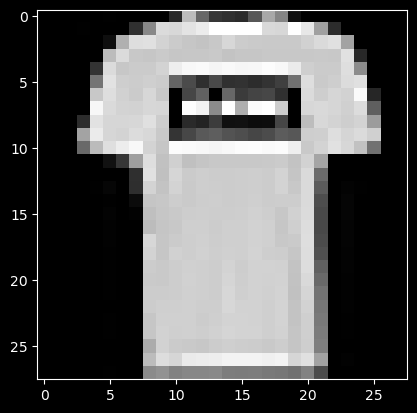

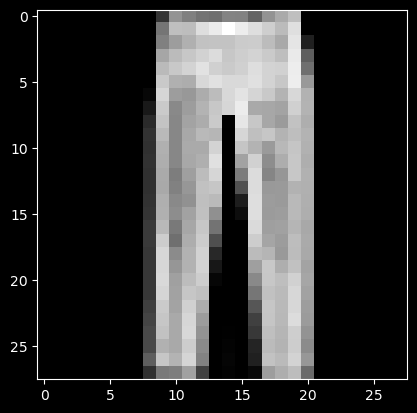

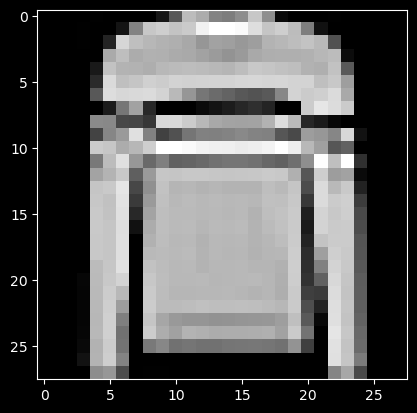

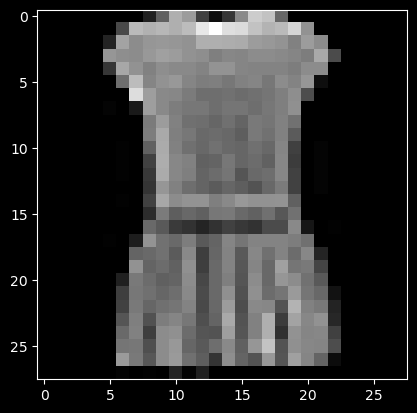

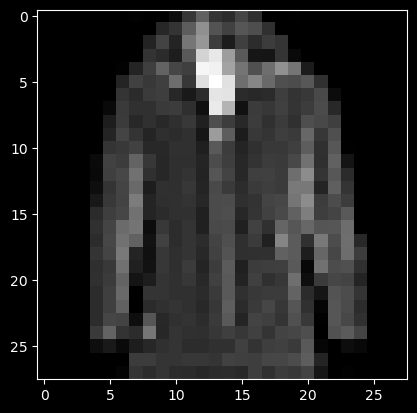

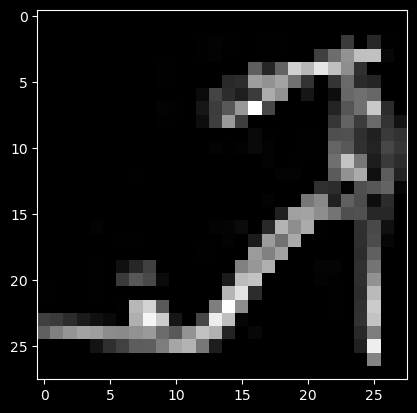

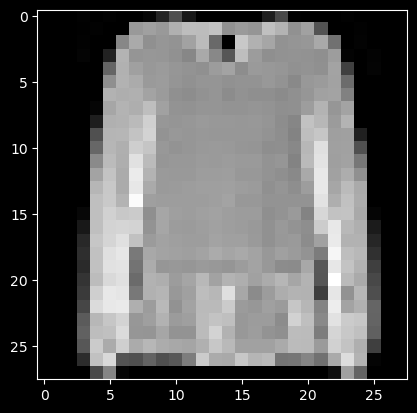

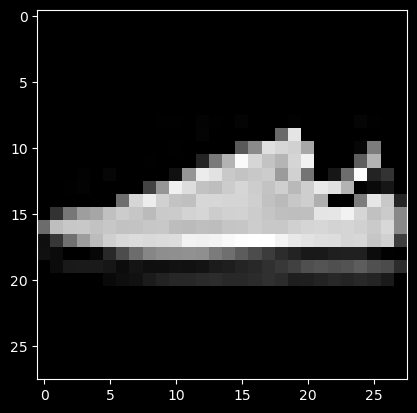

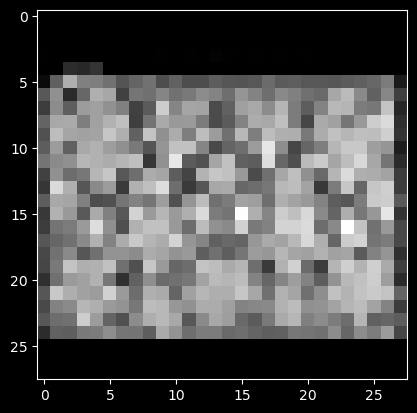

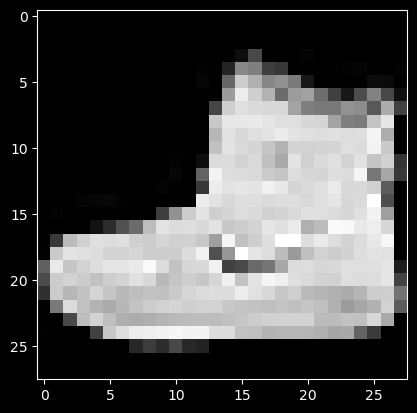

In [5]:
c = 0
y = list(y_train)
for i in range(y_train.shape[0]):
    if c == 10: break
    plt.imshow(x_train[y.index(c)], cmap="gray")
    c += 1
    plt.show()
    

### d

In [6]:
# Min max norm
x_train = x_train / 255.0
x_test = x_test / 255.0

## Q2
### a

In [7]:
fcnn_model = Sequential([
    Flatten(input_shape=[28, 28], name="IL"),
    Dense(300, activation="relu", name="HL1"),
    Dense(100, activation="relu", name="HL2"),
    Dense(10, activation="softmax", name="OL"),
])

fcnn_model.summary()

2023-08-16 20:47:30.696068: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-16 20:47:30.842254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-16 20:47:30.842341: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-16 20:47:30.846938: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-16 20:47:30.847033: I tensorflow/compile

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 IL (Flatten)                (None, 784)               0         
                                                                 
 HL1 (Dense)                 (None, 300)               235500    
                                                                 
 HL2 (Dense)                 (None, 100)               30100     
                                                                 
 OL (Dense)                  (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
fcnn_model.compile(optimizer=Adam(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### b

In [9]:
start = datetime.now()
fcnn_hist = fcnn_model.fit(x_train, y_train, epochs=50, batch_size=50, validation_split=0.1)
end = datetime.now()
fcnn_time = end - start

Epoch 1/50


2023-08-16 20:47:33.222593: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7faa80da7550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-16 20:47:33.222659: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-08-16 20:47:33.229341: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-16 20:47:33.249516: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-16 20:47:33.601904: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-16 20:47:33.704009: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1080/1080 [==============================] - 9s 6ms/step - loss: 0.5461 - accuracy: 0.8051 - val_loss: 0.4762 - val_accuracy: 0.8295
Epoch 2/50
1080/1080 [==============================] - 6s 5ms/step - loss: 0.4269 - accuracy: 0.8469 - val_loss: 0.4701 - val_accuracy: 0.8462
Epoch 3/50
1080/1080 [==============================] - 6s 6ms/step - loss: 0.4000 - accuracy: 0.8571 - val_loss: 0.3858 - val_accuracy: 0.8677
Epoch 4/50
1080/1080 [==============================] - 6s 5ms/step - loss: 0.3779 - accuracy: 0.8641 - val_loss: 0.3863 - val_accuracy: 0.8635
Epoch 5/50
1080/1080 [==============================] - 6s 5ms/step - loss: 0.3687 - accuracy: 0.8665 - val_loss: 0.3934 - val_accuracy: 0.8595
Epoch 6/50
1080/1080 [==============================] - 6s 5ms/step - loss: 0.3633 - accuracy: 0.8680 - val_loss: 0.3917 - val_accuracy: 0.8620
Epoch 7/50
1080/1080 [==============================] - 6s 5ms/step - loss: 0.3520 - accuracy: 0.8744 - val_loss: 0.4428 - val_accuracy: 0.8477
Epo

In [10]:
fcnn_loss, fcnn_acc = fcnn_model.evaluate(x_test, y_test, batch_size=50)
print(f"Loss: {fcnn_loss}")
print(f"Accuracy: {fcnn_acc}")

200/200 [==============================] - 1s 4ms/step - loss: 0.5993 - accuracy: 0.8590
Loss: 0.5993265509605408
Accuracy: 0.859000027179718


### c

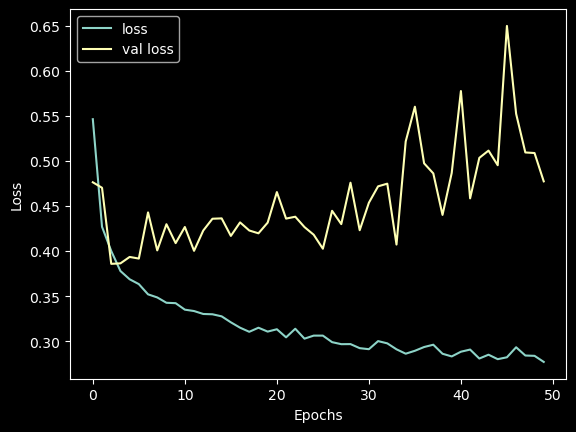

In [11]:
plt.plot(fcnn_hist.history["loss"], label="loss")
plt.plot(fcnn_hist.history["val_loss"], label="val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

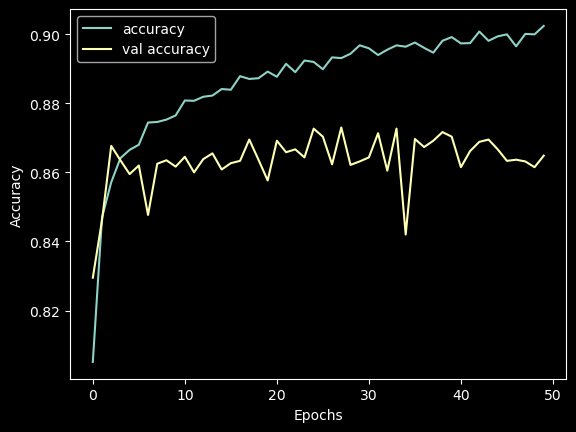

In [12]:
plt.plot(fcnn_hist.history["accuracy"], label="accuracy")
plt.plot(fcnn_hist.history["val_accuracy"], label="val accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
fcnn_pred = np.argmax(fcnn_model.predict(x_test), axis=-1) 
fcnn_pred

  1/313 [..............................] - ETA: 9s

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [64]:
fcnn_cfm = confusion_matrix(y_test, fcnn_pred)
fcnn_cfm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[882,   2,   8,  33,   1,   1,  67,   0,   5,   1],
       [  6, 962,   2,  21,   4,   0,   3,   0,   2,   0],
       [ 19,   1, 729,  20, 155,   0,  68,   0,   8,   0],
       [ 38,   6,   6, 903,  21,   0,  24,   0,   2,   0],
       [  3,   1,  77,  48, 827,   0,  41,   0,   3,   0],
       [  0,   0,   0,   1,   0, 940,   1,  22,  10,  26],
       [210,   2,  99,  41, 130,   0, 508,   0,  10,   0],
       [  0,   0,   0,   0,   0,  12,   0, 923,   1,  64],
       [  9,   1,   6,   4,   6,   2,  22,   3, 947,   0],
       [  0,   0,   0,   1,   0,   9,   1,  15,   5, 969]], dtype=int32)>

[]

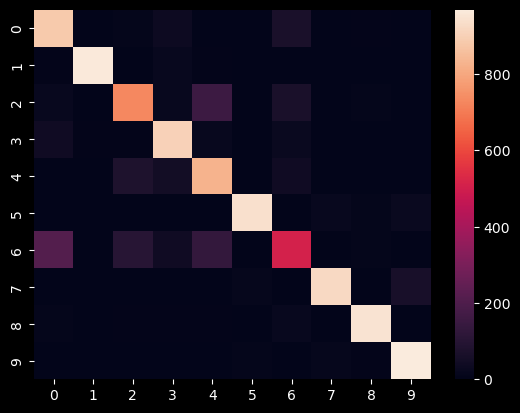

In [66]:
sns.heatmap(fcnn_cfm)
plt.plot()

## Q3
### a

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
cnn1_model = Sequential([
    Input((x_train.shape[1], x_train.shape[2], 1)),
    Conv2D(32, (5, 5), strides=(1, 1), padding="valid", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="sigmoid"),
])
cnn1_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 100)               460900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462742 (1.77 MB)
Trainable params: 462742 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [16]:
cnn1_model.compile(optimizer=Adam(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
start = datetime.now()
cnn1_hist = cnn1_model.fit(x_train, y_train, epochs=50, batch_size=50, validation_split=0.1)
end = datetime.now()
cnn1_time = end - start

Epoch 1/50


2023-08-16 20:52:28.891303: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1080/1080 [==============================] - 9s 6ms/step - loss: 0.4220 - accuracy: 0.8474 - val_loss: 0.3379 - val_accuracy: 0.8815
Epoch 2/50
1080/1080 [==============================] - 6s 5ms/step - loss: 0.3181 - accuracy: 0.8832 - val_loss: 0.3350 - val_accuracy: 0.8748
Epoch 3/50
1080/1080 [==============================] - 6s 5ms/step - loss: 0.2877 - accuracy: 0.8937 - val_loss: 0.3358 - val_accuracy: 0.8807
Epoch 4/50
1080/1080 [==============================] - 6s 5ms/step - loss: 0.2645 - accuracy: 0.8999 - val_loss: 0.3349 - val_accuracy: 0.8820
Epoch 5/50
1080/1080 [==============================] - 6s 6ms/step - loss: 0.2520 - accuracy: 0.9048 - val_loss: 0.3329 - val_accuracy: 0.8885
Epoch 6/50
1080/1080 [==============================] - 6s 5ms/step - loss: 0.2404 - accuracy: 0.9097 - val_loss: 0.3725 - val_accuracy: 0.8743
Epoch 7/50
1080/1080 [==============================] - 6s 6ms/step - loss: 0.2186 - accuracy: 0.9173 - val_loss: 0.3606 - val_accuracy: 0.8822
Epo

In [18]:
cnn1_loss, cnn1_acc = cnn1_model.evaluate(x_test, y_test, batch_size=50)
print(f"Loss: {cnn1_loss}")
print(f"Accuracy: {cnn1_acc}")

200/200 [==============================] - 1s 4ms/step - loss: 1.7346 - accuracy: 0.8806
Loss: 1.7346458435058594
Accuracy: 0.8805999755859375


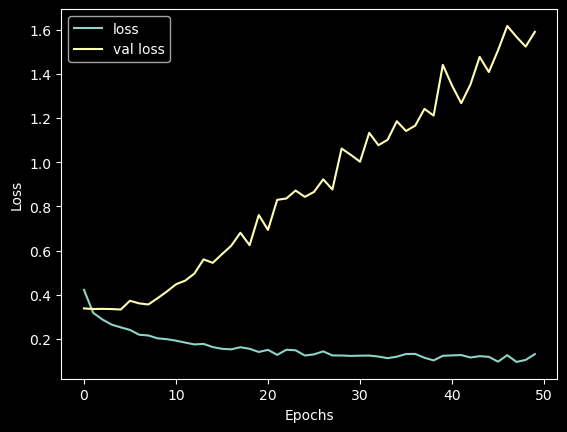

In [19]:
plt.plot(cnn1_hist.history["loss"], label="loss")
plt.plot(cnn1_hist.history["val_loss"], label="val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

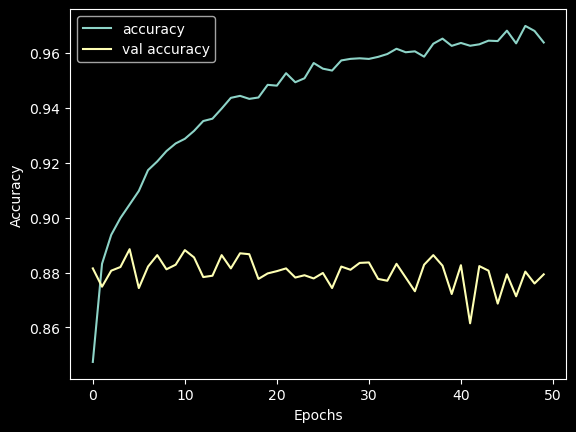

In [20]:
plt.plot(cnn1_hist.history["accuracy"], label="accuracy")
plt.plot(cnn1_hist.history["val_accuracy"], label="val accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### b

In [25]:
cnn2_model = Sequential([
    Input((x_train.shape[1], x_train.shape[2], 1)),
    Conv2D(32, (3, 3), strides=(1, 1), padding="valid", activation="relu"),
    Conv2D(32, (3, 3), strides=(1, 1), padding="valid", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="sigmoid"),
])
cnn2_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               460900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [26]:
cnn2_model.compile(optimizer=Adam(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [27]:
start = datetime.now()
cnn2_hist = cnn2_model.fit(x_train, y_train, epochs=25, batch_size=50, validation_split=0.1)
end = datetime.now()
cnn2_time = end - start

Epoch 1/25
1080/1080 [==============================] - 10s 7ms/step - loss: 0.4207 - accuracy: 0.8477 - val_loss: 0.3476 - val_accuracy: 0.8725
Epoch 2/25
1080/1080 [==============================] - 7s 7ms/step - loss: 0.3056 - accuracy: 0.8867 - val_loss: 0.3184 - val_accuracy: 0.8812
Epoch 3/25
1080/1080 [==============================] - 7s 7ms/step - loss: 0.2773 - accuracy: 0.8953 - val_loss: 0.2862 - val_accuracy: 0.8925
Epoch 4/25
1080/1080 [==============================] - 7s 6ms/step - loss: 0.2554 - accuracy: 0.9038 - val_loss: 0.2823 - val_accuracy: 0.9005
Epoch 5/25
1080/1080 [==============================] - 7s 6ms/step - loss: 0.2355 - accuracy: 0.9111 - val_loss: 0.3195 - val_accuracy: 0.8948
Epoch 6/25
1080/1080 [==============================] - 7s 6ms/step - loss: 0.2173 - accuracy: 0.9185 - val_loss: 0.3266 - val_accuracy: 0.8878
Epoch 7/25
1080/1080 [==============================] - 7s 6ms/step - loss: 0.2054 - accuracy: 0.9217 - val_loss: 0.3325 - val_accuracy

In [28]:
cnn2_loss, cnn2_acc = cnn2_model.evaluate(x_test, y_test, batch_size=50)
print(f"Loss: {cnn2_loss}")
print(f"Accuracy: {cnn2_acc}")

200/200 [==============================] - 1s 4ms/step - loss: 0.8086 - accuracy: 0.8928
Loss: 0.8085615038871765
Accuracy: 0.892799973487854


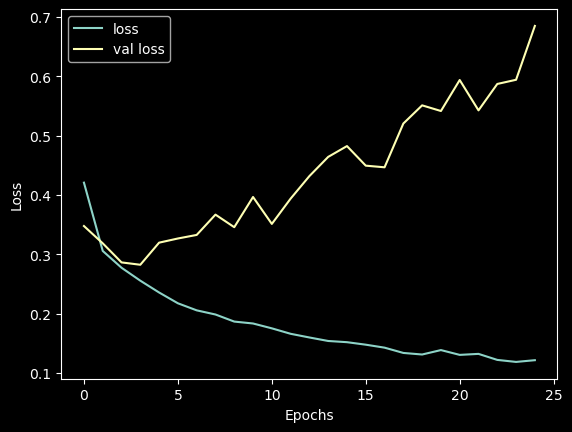

In [29]:
plt.plot(cnn2_hist.history["loss"], label="loss")
plt.plot(cnn2_hist.history["val_loss"], label="val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

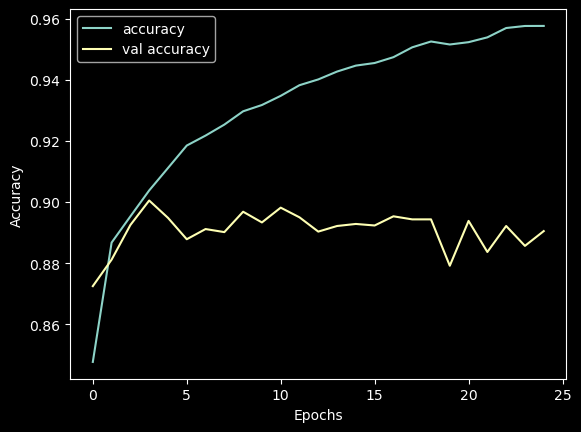

In [30]:
plt.plot(cnn2_hist.history["accuracy"], label="accuracy")
plt.plot(cnn2_hist.history["val_accuracy"], label="val accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### e

The second CNN with 2 convolutional layers seems to perform better than the CNN with 1 layer but tends to overfit much faster. Hence, I had to reduce the epochs to 25 to avoid overfitting.

## Q4

Both FCNN and CNN achieved high accuracy with the fashion mnist dataset. However, CNN was more efficient and performed better due to its ability to extract relevant features through convolutions.

## Q5

FCNN has lesser parameters than CNN, 266610 v/s 462742 in the above models because of the architecture that I have chosen as depicted by `model.summary()`

## Q6

In [34]:
print(fcnn_time)
print(cnn1_time)
print(cnn2_time * 2) # Half as many epochs used

0:04:53.830145
0:04:59.928872
0:05:49.682156


The second CNN with 2 convolutional layers takes more time than the first CNN with 1 convolutional layer due to it having more convolutional layers which implies there is more computation involved.

The FCNN techincally should take more time to train than a CNN due to it having larger number of weights to be trained due to lack of convolutions and that CNN's are designed to extract the most relevant features from the images passed to it resulting in fewer parameters

The FCNN here shows a 7 second advantage which might be due to external factors like differing GPU loads during training, processes taking variable amounts of computer power randomly, etc.